In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Разминка (4 балла)

## 1.1 Создание матриц (0.25 балла)

Создайте 4 матрицы
- A - "шахматную" из нулей и единиц, размера 6 на 3, левое верхнее значение (A[0][0]) равно 1,
- В - из чисел от 1 до 24, записанных в виде змейки, размера 6 на 4,
- C - из случайных целых чисел от 2 до 10 (обе границы включительно), размера 4 на 3
- D - из нулей с единичками на главной диагонали, размера 4 на 4.

**Создайте из этих матриц "лоскутную" матрицу S**

A В

С D

используя **только стандартные** операции numpy. Comprehensions использовать нельзя.

После этого допишите к полученной матрице S матрицу F размера 10 на 2 из нулей, чтобы получилась матрица G:

S F

P.S. Когда мы говорим, что матрица имеет размер x на y, x - количество строк, y - количество столбцов.

In [2]:
A = np.zeros((6, 3), dtype=int)

A[::2, ::2] = 1
A[1::2, 1::2] = 1

B = np.arange(1, 25).reshape((6, 4))
B[1::2] = B[1::2, ::-1]

C = np.random.randint(2, 11, size=(4, 3))

D = np.eye(4, dtype=int)

S = np.vstack((np.hstack((A, B)), np.hstack((C, D))))

F = np.zeros((10, 2), dtype=int)

G = np.hstack((S, F))

print(G)

# # YOUR CODE HERE

[[ 1  0  1  1  2  3  4  0  0]
 [ 0  1  0  8  7  6  5  0  0]
 [ 1  0  1  9 10 11 12  0  0]
 [ 0  1  0 16 15 14 13  0  0]
 [ 1  0  1 17 18 19 20  0  0]
 [ 0  1  0 24 23 22 21  0  0]
 [ 6  9 10  1  0  0  0  0  0]
 [ 4  7  8  0  1  0  0  0  0]
 [ 4  3 10  0  0  1  0  0  0]
 [ 6  4  5  0  0  0  1  0  0]]


## 1.2 Поиск ближайшего соседа (0.25 балла)

Реализуйте функцию, принимающую на вход матрицу X и некоторое число a и возвращающую ближайший к числу элемент матрицы.
Например, для X = np.arange(0,10).reshape((2, 5)) и a = 3.6 ответом будет 4. Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

In [3]:
def swap_mask_for_average(X, a):
    return X.flat[np.abs(X - a).argmin()]

## 1.3 Очень странная нейросеть (0.25 балла)

Реализуйте одну очень странную нейросеть. Нейросеть должна:

- Возводить матрицу A (матрицу весов) размера N x N в квадрат
- В качестве первого преобразования умножать вектор X длины N (вектор признаков) на матрицу весов A**2 (на выходе получается новый вектор);
- В качестве второго преобразования умножать вектор, полученный на прошлом шаге, на вектор b (вектор весов) размера N (на выходе получается скалярное число).

Считаем, что все числа (элементы матриц и векторов) - числа с плавающей точкой.

In [4]:
# Придумайте свои данные для примера, N >= 4
N = 6

A = np.random.rand(N, N)
b = np.random.rand(N)
X = np.random.rand(N)


def very_strange_neural_network(A, b, X):
    return ((A @ A) @ X) @ b


print(very_strange_neural_network(A, b, X))

17.320808565365216


## 1.4 Джунгли зовут! (0.25 балла)

Перед вами матрица M - карта местности тяжелопроходимых джунглей, составленная Ларой Крофт. На карте каждая ячейка - целое число, обозначающее высоту над уровнем моря (если число больше нуля) в метрах или глубину моря (если число меньше нуля) в метрах в данной ячейке карты размером метр на метр. Если число 0, то это часть суши - берег.


Вам необходимо посчитать:
- Общую площадь клеточек моря, в которых его глубина больше 5 (в м^2)
- Общий объём всей воды на карте (в м^3)
- Максимальную высоту над уровнем моря, которая есть на этой карте (в м)

In [ ]:
def find_deep_sea_area(M):
    return (M < -5).sum()


def find_water_volume(M):
    return np.abs(M[M < 0]).sum()


def find_max_height(M):
    return M.flat[M.argmax()]

In [ ]:
# Можно подставить свой пример
M = np.array([[-7, -3, -1, 0], [-4, -3, 1, 19], [-2, 0, 4, 25], [-1, 3, 6, 9]])

# простая проверка для примера выше
assert np.isclose(find_deep_sea_area(M), 1)
assert np.isclose(find_water_volume(M), 21)
assert np.isclose(find_max_height(M), 25)

print("Общая площадь моря на карте -", find_deep_sea_area(M), "м^2")
print("Общий объем воды на карте -", find_water_volume(M), "м^3")
print("Максимальный уровень над уровнем моря на карте -", find_max_height(M), "м")

Общая площадь моря на карте - 1 м^2
Общий объем воды на карте - 21 м^3
Максимальный уровень над уровнем моря на карте - 25 м


## 1.5 Острова сокровищ (0.25 балла)


На вход функции подаётся массив a из нулей и единиц. Необходимо посчитать, сколько в массиве есть блоков из идущих подряд единиц (островков). Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.diff`

In [ ]:
def count_all_islands(a):
    diff = np.diff(a)
    add = 1 if a[0] == 1 else 0
    return len(diff[diff == 1]) + add

In [ ]:
# можно подставить свой пример

a = np.array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

# простая проверка для примера выше
assert count_all_islands(a) == 4
print(count_all_islands(a))

4


## 1.6 Маскарад (0.25 балла)

На вход идёт 2-мерная матрица X, заполненная числами с плавающей точкой, и дробное число a. Нужно заменить все ячейки в матрице, которые больше, чем а, на среднее значение среди элементов матрицы Х.

**Нужно** пользоваться базовыми функциями numpy, **нельзя** пользоваться циклами.

In [ ]:
def swap_mask_for_average(X, a):
    X[X > a] = np.mean(X)
    return X

In [ ]:
# Можно подставить свой пример
M = np.array([[-7, -3, -1, 0], [-4, -3, 1, 19], [-2, 0, 4, 25], [-1, 3, 6, 9]])
a = 5

# простая проверка для примера выше
assert np.allclose(
    swap_mask_for_average(M, a),
    np.array([[-7, -3, -1, 0], [-4, -3, 1, 2], [-2, 0, 4, 2], [-1, 3, 2, 2]]),
)

swap_mask_for_average(M, a)

array([[-7, -3, -1,  0],
       [-4, -3,  1,  2],
       [-2,  0,  4,  2],
       [-1,  3,  2,  2]])

## 1.7 По горячим трейсам (0.25 балла)

На вход приходит квадратная матрица М, надо посчитать разницу между суммой по главной и побочной диагоналями матрицы.


Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.trace`

In [ ]:
def count_trace_diff(M):
    return np.trace(M) - np.trace(np.fliplr(M))

In [ ]:
# Можно подставить свой пример
M = np.array([[-7, -3, -1, 0], [-4, -3, 1, 19], [-2, 0, 4, 25], [-1, 3, 6, 9]])

# простая проверка для примера выше
assert np.allclose(count_trace_diff(M), 3)

count_trace_diff(M)

3

## 1.8 Царь горы (0.25 балла)

На вход приходит вектор a размера N. Необходимо при помощи сложения, конкатенации, бродкастинга получить симметричную матрицу размера 2N x 2N, у которой в середине максимальное значение, а к краям оно убывает.

Пример: a = (0, 1, 2)

Результат:

0 1 2 2 1 0 \\
1 2 3 3 2 1 \\
2 3 4 4 3 2 \\
2 3 4 4 3 2 \\
1 2 3 3 2 1 \\
0 1 2 2 1 0 \\

In [4]:
def create_mountain(a):
    N = len(a)

    base_matrix = a[:, None] + a[None, :]

    symmetric_matrix = np.block(
        [
            [base_matrix, base_matrix[:, ::-1]],
            [base_matrix[::-1, :], base_matrix[::-1, ::-1]],
        ]
    )
    return symmetric_matrix

In [5]:
# Можно подставить свой пример
a = np.array([0, 1, 2, 3, 4])

create_mountain(a)

array([[0, 1, 2, 3, 4, 4, 3, 2, 1, 0],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [0, 1, 2, 3, 4, 4, 3, 2, 1, 0]])

## 1.9 Монохромная фотография 9 на 12 (0.5 балла)

На вход приходит двухмерная матрица P размера N на M, заполненная числами от 0 до 255, соответствующая некой черно-белой фотографии и натуральное число C. Необходимо из неё получить матрицу размера (N-C + 1) x (M-C+1), где каждая ячейка - среднее значение соответствующей подматрицы размера C x C. Таким образом, по сути, мы сделаем примитивное размытие изображения (и немного потеряем в его размере)

In [8]:
def custom_blur(P, C):
    N, M = P.shape

    kernel = np.ones((C, C)) / (C * C)

    result = np.zeros((N - C + 1, M - C + 1))

    for i in range(N - C + 1):
        for j in range(M - C + 1):
            sm = P[i : i + C, j : j + C]
            result[i, j] = np.sum(sm * kernel)

    return result

In [9]:
# можно подставить свой пример
P = np.arange(0, 12).reshape((3, 4))
kernel = 2

# простая проверка для примера выше
assert np.allclose(custom_blur(P, kernel), np.array([[2.5, 3.5, 4.5], [6.5, 7.5, 8.5]]))
custom_blur(P, 2)

array([[2.5, 3.5, 4.5],
       [6.5, 7.5, 8.5]])

## 1.10 Функция проверки (0.75 балла)

На вход функции поступает произвольное (>2) кортежей размеров (shape) различных матриц. Необходимо вернуть True если можно последовательно сложить эти матрицы (возможно, с помощью broadcasting), и False если нет.

In [13]:
def check_successful_broadcast(*matrices):
    result_shape = matrices[0]

    for shape in matrices[1:]:
        max_len = max(len(result_shape), len(shape))
        result_shape = [1] * (max_len - len(result_shape)) + list(result_shape)
        shape = [1] * (max_len - len(shape)) + list(shape)

        result_shape = [
            max(a, b) if a == b or a == 1 or b == 1 else None
            for a, b in zip(result_shape, shape)
        ]

        if None in result_shape:
            return False

    return True

In [14]:
assert check_successful_broadcast((5, 6, 7), (6, 7), (1, 7))
# можно ещё потестировать на своих примерах

## 1.11 Попарные расстояния (0.75 балла)

На вход подаются матрицы A размера m x k и матрица B размера n x k. Нужно получить матрицу размера m x n, содержащую попарные евклидовы расстояния.

Можно пользоваться только базовыми функциями, нельзя пользоваться циклами, сторонними библиотеками; скорее всего, пригодится broadcasting. Авторское решение записывается **в одну строчку** в соответствии со всеми правилами кодстайла.

In [12]:
def pairwise_distances(A, B):
    return np.sqrt(((A[:, None, :] - B[None, :, :]) ** 2).sum(axis=2))

In [11]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8], [9, 10]])

print(pairwise_distances(A, B))

[[ 5.65685425  8.48528137 11.3137085 ]
 [ 2.82842712  5.65685425  8.48528137]]


Объясни принцип работы этой одной строчки. Что именно происходит в ней?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

мы добавили оси чтобы при broadcasting мы посчитали попарныя разности векторов дольше просто возвели их в квадрат и сложили

# 2. Обработка данных эксперимента (3 балла)

А сейчас, дамы и господа, мы научимся использовать библиотеки для анализа данных в реальности!

**Причина появления этого раздела проста**: многие студенты ПМФ даже во втором и третьем семестрах продолжают использовать Excel, калькулятор или лист бумаги. Хочется открыть глаза на ещё один способ выполнения лабораторных с намного меньшим порогом вхождения, чем тот же Excel. Авторы надеются, что кого-то это замотивирует присмотреться к удобным библиотекам.

*Спонсор данных для раздела - blacksamorez. Без него пять счастливых семестров лаб были бы совсем не счастливыми...*

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  2.1. Постановка задачи и данные

Предположим, у нас есть гироскоп с прицепленным к его оси грузом на рычаге (см. рисунок для быстрого понимания, а подробности можно узнать в [лабораторном практикуме](https://lib.mipt.ru/book/267519/), том 1, стр.160). Из-за наличия груза гироскоп начинает медленно [прецессировать](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D1%86%D0%B5%D1%81%D1%81%D0%B8%D1%8F), т.е. вращаться вокруг вертикальной оси с какой-то более-менее постоянной частотой.

Мы с вами разберём часть этой лабораторной, в основном касающуюся обработки данных и построения графиков.

<center><img src='https://drive.google.com/uc?export=view&id=1KfYQ0hKYRDhi5uk7C8lNffZBNy8NF7nu' width=600>

Изображение гироскопа с подвешенным грузом Г и рычагом С</center>

Для начала посмотрим на данные, которые любезно кто-то для нас собрал. Создайте датафрейм из [файла](https://drive.google.com/file/d/1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq/view?usp=sharing)

In [26]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq' -O /content/sample_data/data_numpy_lab.csv

--2024-11-23 22:55:37--  https://drive.google.com/uc?export=download&id=1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq
Resolving drive.google.com (drive.google.com)... 142.251.170.101, 142.251.170.113, 142.251.170.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.170.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq&export=download [following]
--2024-11-23 22:55:37--  https://drive.usercontent.google.com/download?id=1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.174.132, 2404:6800:4008:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.174.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 876 [application/octet-stream]
Saving to: ‘/content/sample_data/data_numpy_lab.csv’

/content/sample_dat 100%[===================

In [33]:
# YOUR CODE HERE
data = pd.read_csv("/content/sample_data/data_numpy_lab.csv", index_col=0)
data.head()

,N,"t, sec","sigma_t, sec","mass, gramm","length, cm","phi, rad"
1,4,268,1,180.0,121.0,0.16
2,4,264,1,180.0,121.0,0.18
3,4,275,1,180.0,121.0,0.16
4,4,263,1,180.0,121.0,0.17
5,4,267,1,180.0,121.0,0.17


In [19]:
from google.colab import drive

drive.mount("/content/drive")

MessageError: Error: credential propagation was unsuccessful

## 2.2 Работа с данными

Колонки в датафрейме следующие:

N - количество полных оборотов гироскопа в эксперименте;

t, в секундах - время эксперимента;

$\sigma_t$ - погрешность измерения времени;

mass - масса груза, подвешенного к рычагу на гироскопе;

length - длина плеча вышеупомянутого рычага;

phi - угол в радианах, на который опустился рычаг за время эксперимента. Понадобится, чтобы оценить влияние силы трения в гироскопе на прецессию.

Так как физики любят оперировать величинами адекватной размерности, нужно перевести колонки с массой в килограммы, а с длиной - в метры. Затем переименуйте все колонки так, чтобы в них не осталось упоминаний о размерности - только названия физических величин.

In [34]:
# YOUR CODE HERE

data["mass, gramm"] = data["mass, gramm"] / 1000
data["length, cm"] = data["length, cm"] / 100

data.rename(
    columns={
        "t, sec": "t",
        "sigma_t, sec": "sigma_t",
        "mass, gramm": "mass",
        "length, cm": "length",
        "phi, rad": "phi",
    },
    inplace=True,
)

assert data.mass.mean() < 0.3
assert np.allclose(data.length.mean(), 1.155)
assert all(" " not in column for column in data.columns)

data.head()

,N,t,sigma_t,mass,length,phi
1,4,268,1,0.18,1.21,0.16
2,4,264,1,0.18,1.21,0.18
3,4,275,1,0.18,1.21,0.16
4,4,263,1,0.18,1.21,0.17
5,4,267,1,0.18,1.21,0.17


Добавьте в датафрейм колонки с соответствующими именами и значениями, вычисленными по формулам:

`omega`: $\Omega = 2 \pi \cdot \frac{N}{t}$

`sigma_omega`: $\sigma_{\Omega} = \Omega / t \cdot \sigma_t$

`omega_down`: $\Omega_{down} = \varphi / t$

`sigma_down`: $\Omega_{down} \cdot \sigma_t / t$

`momentum`: $M = m \cdot g \cdot l$ (`g = 9.8 м/с^2`)

`momentum_down`: $M_{down} = m \cdot \frac{\varphi}{t^2} \cdot l^2$

`sigma_momentum`: $\sigma_{M} = M_{down} \cdot 2 \cdot \frac{\sigma_t}{t}$


In [40]:
# YOUR CODE HERE
# data['omega'] = ...
# ...

data["omega"] = 2 * np.pi * data["N"] / data["t"]
data["sigma_omega"] = data["omega"] / data["t"] * data["sigma_t"]
data["omega_down"] = data["phi"] / data["t"]
data["sigma_down"] = data["omega_down"] * data["sigma_t"] / data["t"]
data["momentum"] = data["mass"] * 9.8 * data["length"]
data["momentum_down"] = (
    data["mass"] * (data["phi"] / (data["t"] ** 2)) * data["length"] ** 2
)
data["sigma_momentum"] = data["momentum_down"] * 2.0 * (data["sigma_t"] / data["t"])

assert np.allclose(data.momentum_down[1], 5.892e-07)
assert np.allclose(data.sigma_omega[0:5], 3.5e-04, atol=3e-5)
assert np.allclose(data.sigma_momentum[0:5], 2.2e-09, atol=5e-10)

data.head()

AssertionError: 

Возможно, вы уже задались вопросом, для чего так много раз повторяются эксперименты с одной и той же массой. Чтобы получить более стабильные результаты, конечно же! Посчитайте теперь средние значения колонок `omega`, `sigma_omega`, `momentum` и`momentum_down` для каждой уникальной массы.

**Подсказка:** функция groupby вам поможет. Никаких циклов!

In [41]:
# YOUR CODE HERE
# grouped_data = ...
grouped_data = data.groupby("mass")[
    ["omega", "sigma_omega", "momentum", "momentum_down"]
].mean()

assert 0.273 in grouped_data.index
assert np.allclose(grouped_data.omega[0.273], 0.1433)

grouped_data

,omega,sigma_omega,momentum,momentum_down
mass,,,,
0.142,0.066661,0.000236,1.683836,4.108862e-07
0.180,0.094012,0.000352,2.134440,6.202853e-07
0.216,0.081687,0.000354,2.286144,7.755223e-07
0.273,0.143300,0.000817,3.263988,2.166527e-06
0.341,0.150752,0.000723,3.675980,1.577406e-06
0.614,0.185194,0.000910,6.679092,3.030996e-06


## 2.3 Простые графики и МНК

Теперь время для повторного знакомства с методом наименьших квадратов. Конечно же, мы не заставим вас писать МНК самостоятельно! <s>Мы же не звери</s>


В numpy функция [np.polyfit](https://numpy.org/devdocs/reference/generated/numpy.polyfit.html) по `x`, `y` и степени `p` вычисляет многочлен заданной степени, являющийся МНК-оценкой зависимости `y(x)`.

Функция [np.polyval](https://numpy.org/devdocs/reference/generated/numpy.polyval.html), в свою очередь, вычисляет многочлен `P(x)` по заданным коэффициентам.

Ваша задача - построить график зависимости $\Omega (M)$ угловой скорости от момента инерции. На графике должны присутствовать экспериментальные точки, а также прямая, построенная по методу наименьших квадратов. В легенду вынесите полином с записанными коэффициентами. Не забудьте подписать оси (14 шрифт), задать сетку и сделать правильный заголовок (18 шрифт)!

<center><img src='https://drive.google.com/uc?export=view&id=1xumON0195iA4HGSqvpS0FAhPGxuCdKH8' width=600>

Пример получившегося графика</center>

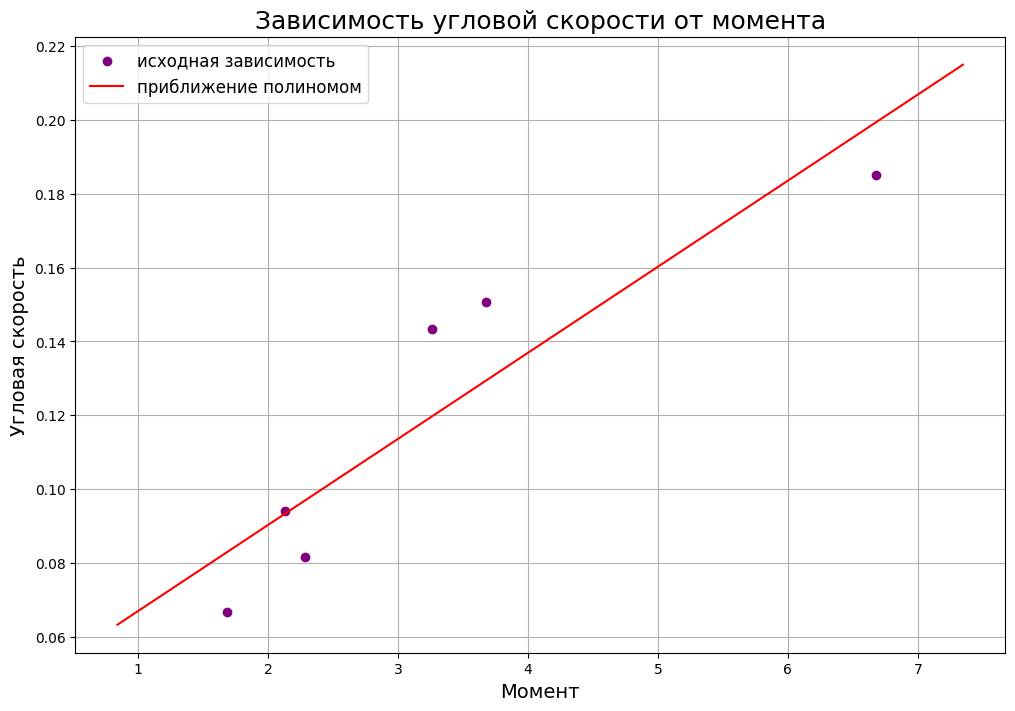

In [58]:
omega_np = np.array(grouped_data.omega)
momentum_np = np.array(grouped_data.momentum)

coefs = np.polyfit(momentum_np, omega_np, deg=1)

# Чтобы прямая построилась красиво, немножко заходя за точки
x_lsq = np.linspace(momentum_np.min() * 0.5, momentum_np.max() * 1.1, 100)

# Примените np.polyval к коэффициентам и x_lsq
y_lsq = np.polyval(p=coefs, x=x_lsq)

fig = plt.figure(figsize=(12, 8))

plt.scatter(momentum_np, omega_np, label="исходная зависимость", color="purple")

plt.plot(x_lsq, y_lsq, label="приближение полиномом", color="red")

plt.title("Зависимость угловой скорости от момента", fontsize=18)
plt.xlabel("Момент", fontsize=14)
plt.ylabel("Угловая скорость", fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

`np.polyfit` также умеет оценивать погрешности! Если точнее, он возвращает матрицу ковариаций для метода наименьших квадратов. Не будем углубляться в математику, главное знать, что на диагонали у неё стоят дисперсии полученных коэффициентов. Для получения собственно погрешности $\sigma$ необходимо взять корень из этих дисперсий.

Также стоит упомянуть про параметр `W`, задающий веса точек для оценки. Если известны ошибки $y_{error}$, можно задать веса как $W = 1 / y_{error}$, и прямая получится ещё более точной. Чтобы учесть ещё и ошибки по $x$, нужны, к сожалению, уже другие методы (но скорее всего, вам не понадобятся даже ошибки по $y$).

Представим, что произошла неприятность, и погрешности возросли в 10 раз!

In [61]:
data["sigma_down"] *= 10
data["sigma_momentum"] *= 10



Теперь вам нужно нарисовать график зависимости $\Omega_{down} (M_{down})$ <b>(не $\Omega(M)$!)</b> для точек с крестами погрешностей, а также построить не только прямую по оценке наименьших квадратов, а ещё и учесть погрешности оценок коэффициентов! Т.е. нужно построить три прямых: $k \cdot x + b$, которую выдал МНК, $(k - \sigma_k) \cdot x + (b - \sigma_b)$, $(k + \sigma_k) \cdot x + (b + \sigma_b)$, и закрасить промежуток между этими прямыми (в этом вам поможет функция plt.fill_between). Остальное оформление оставьте таким же, как в предыдущем задании.

_Примечание: часто в МНК не смотрят на погрешность $b$, оставляя только $\sigma_k$._

<center><img src='https://drive.google.com/uc?export=view&id=1SriaMzJah7F610ocIK_O1-HqqtMQgxlg' width=600>

Пример получившегося графика</center>

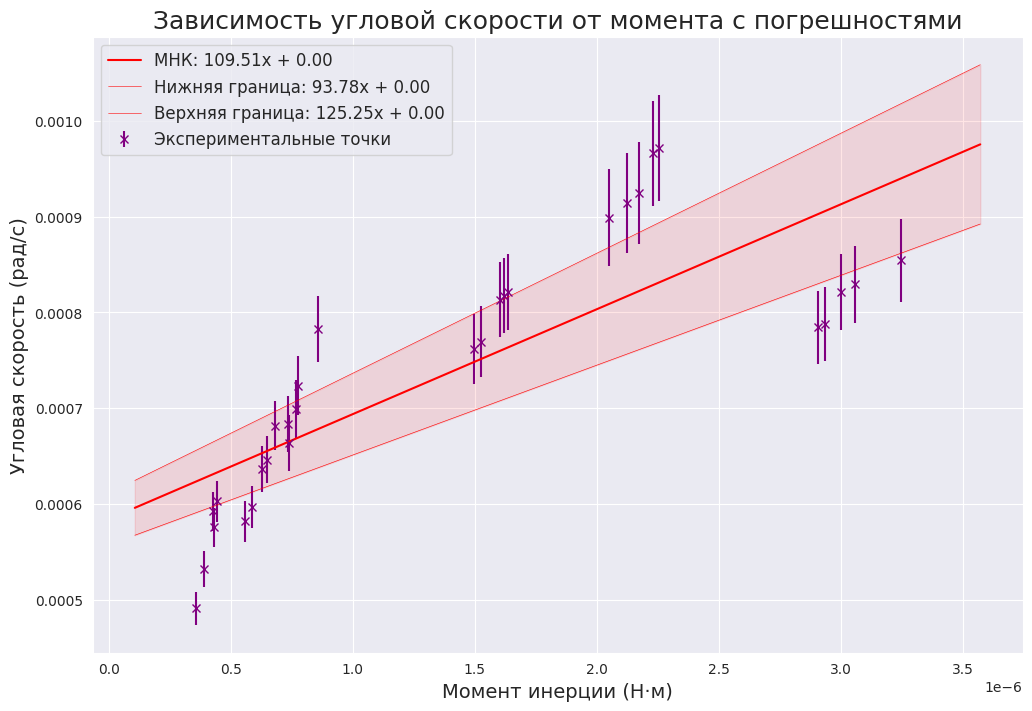

In [103]:
omega_down_np = np.array(data.omega_down)
momentum_down_np = np.array(data.momentum_down)

coefs, cov = np.polyfit(momentum_down_np, omega_down_np, deg=1, cov=True)

x_lsq = np.linspace(momentum_down_np.min() * 0.3, momentum_down_np.max() * 1.1, 100)

lsq_stds = np.sqrt(np.diag(cov))

k, b = coefs
sigma_k, sigma_b = lsq_stds

y_lsq = k * x_lsq + b
y_lsq_lower = (k - sigma_k) * x_lsq + (b - sigma_b)
y_lsq_upper = (k + sigma_k) * x_lsq + (b + sigma_b)

fig = plt.figure(figsize=(12, 8))

plt.errorbar(
    momentum_down_np,
    omega_down_np,
    xerr=None,
    yerr=data["sigma_down"],
    fmt="x",
    color="purple",
    label="Экспериментальные точки",
)

plt.plot(x_lsq, y_lsq, color="red", label=f"МНК: {k:.2f}x + {b:.2f}")

plt.plot(
    x_lsq,
    y_lsq_lower,
    color="red",
    label=f"Нижняя граница: {k - sigma_k:.2f}x + {b - sigma_b:.2f}",
    linewidth=0.4,
)
plt.plot(
    x_lsq,
    y_lsq_upper,
    color="red",
    label=f"Верхняя граница: {k + sigma_k:.2f}x + {b + sigma_b:.2f}",
    linewidth=0.4,
)

plt.fill_between(x_lsq, y_lsq_lower, y_lsq_upper, color="red", alpha=0.1)

plt.title("Зависимость угловой скорости от момента с погрешностями", fontsize=18)
plt.xlabel("Момент инерции (Н·м)", fontsize=14)
plt.ylabel("Угловая скорость (рад/с)", fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)

# YOUR CODE HERE
# ...
plt.show()

# 3. Работа с датасетом (3 балла)

Датасет ирисов использовался в статье Р.А. Фишера 1936 года «Использование множественных измерений в таксономических задачах», а в наши дни часто используется начинающими аналитиками данных.

В наборе данных включены три вида ирисов по 50 образцов каждый, а также некоторые свойства каждого цветка. Один вид цветка линейно отделим от двух других, но два других не отделимы линейно друг от друга.

Столбцы в этом датасете:

Идентификатор (Id) \\
Длина чашелистика, см (SepalLengthCm) \\
Ширина чашелистика, см (SepalWidthCm) \\
Длина лепестка, см (PetalLengthCm) \\
Ширина лепестка, см (PetalWidthCm) \\
Вид (Species) \\

<font color='red'>ВНИМАНИЕ!</font> Все графики в этой части должны быть подписаны, а на осях должны быть подписи на русском языке.

In [65]:
sns.set_style("darkgrid")

In [75]:
# Считайте csv в DataFrame pandas при помощи pd.read_csv
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(
    iris.data,
    columns=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"],
)
df["Species"] = np.where(
    iris.target == 0, "Setosa", np.where(iris.target == 1, "Versicolor", "Virginica")
)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
# Понятно, что колонка Id нам не очень нужна
# Поэтому давайте её удалим - HINT: используйте метод drop

# TODO
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Давайте проверим, сколько у нас разных видов ирисов в итоге - должно быть 3 по 50 штук каждый. Воспользуйтесь `value_counts` , чтобы посмотреть, какие есть возможные значения у колонки species.**

In [81]:
print(df["Species"].value_counts())

Species
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64


## 3.1 Графики длины и ширины лепестка ириса

Давайте попробуем сравнить, связаны ли ширина и длина лепестков - воспользуйтесь `sns.scatterplot`, чтобы отобразить на оси OXY значения. Не забудьте подписать график и оси!

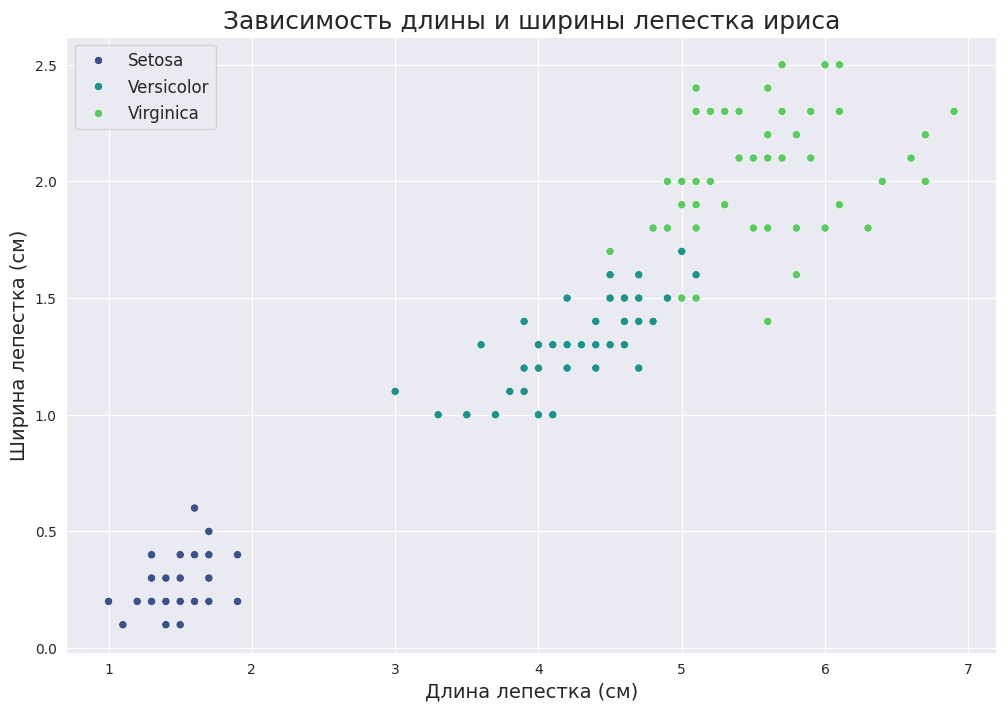

In [83]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df, x="PetalLengthCm", y="PetalWidthCm", hue="Species", palette="viridis"
)

plt.title("Зависимость длины и ширины лепестка ириса", fontsize=18)
plt.xlabel("Длина лепестка (см)", fontsize=14)
plt.ylabel("Ширина лепестка (см)", fontsize=14)
plt.legend(fontsize=12)

plt.show()

Напишите, какие выводы можно сделать из графика. Чего графику не хватает, чтобы он был информативным?

<font color='red'>ВАШ ОТВЕТ ЗДЕСЬ</font>

По длине и ширине лепестка наверника мажно отличить Setosa и почти наверное Versicolor

Давайте попробуем другие графики для тех же целей из библиотеки seaborn - `sns.jointplot`; кроме того, попробуйте выделить цветом точки на графике в зависимости от вида ириса - воспользуйтесь `sns.facetgrid`. В следующих ячейках выведите эти два графика и проанализируйте.

<Figure size 1200x800 with 0 Axes>

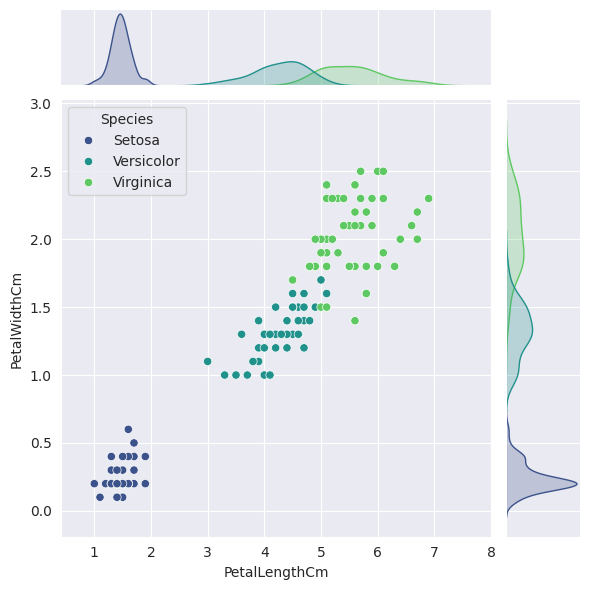

In [86]:
plt.figure(figsize=(12, 8))

sns.jointplot(
    data=df,
    x="PetalLengthCm",
    y="PetalWidthCm",
    hue="Species",
    kind="scatter",
    palette="viridis",
)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


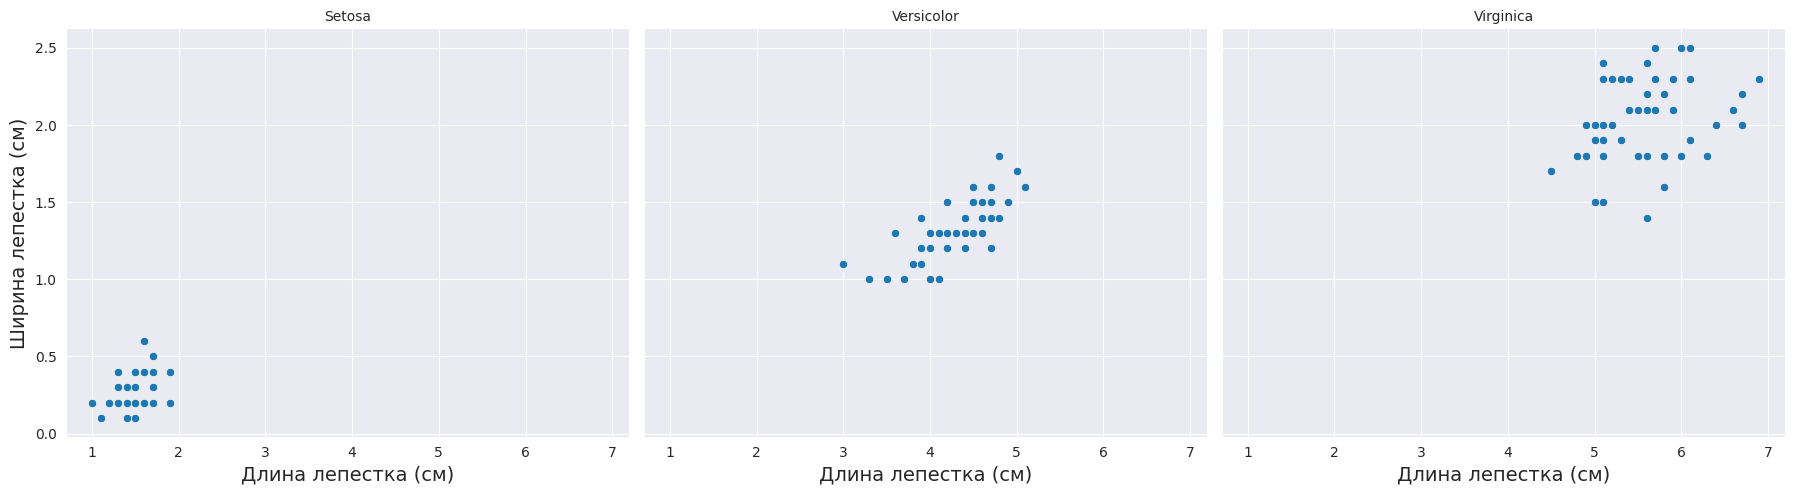

In [89]:
g = sns.FacetGrid(df, col="Species", height=5, aspect=1.2)
g.map(sns.scatterplot, "PetalLengthCm", "PetalWidthCm", palette="viridis")

g.set_axis_labels("Длина лепестка (см)", "Ширина лепестка (см)", fontsize=14)
g.set_titles("{col_name}", fontsize=16)

plt.show()

Какие выводы можно сделать из этих графиков? Какой из 3 методов - scatterplot, jointplot, facetgrid вам кажется лучше?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

как и было сказано по выделенным параметрам классы довольно хорошо различимы

## 3.2 Графики распределений значений длины лепестка

Постройте график "ящика с усами" - `sns.boxplot` и его аналог - `sns.violinplot`. По оси Ox должны находиться возможные виды ирисов, по оси Oy.

<ipython-input-91-cb66ffd4f3c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Species", y="PetalWidthCm", palette="viridis")


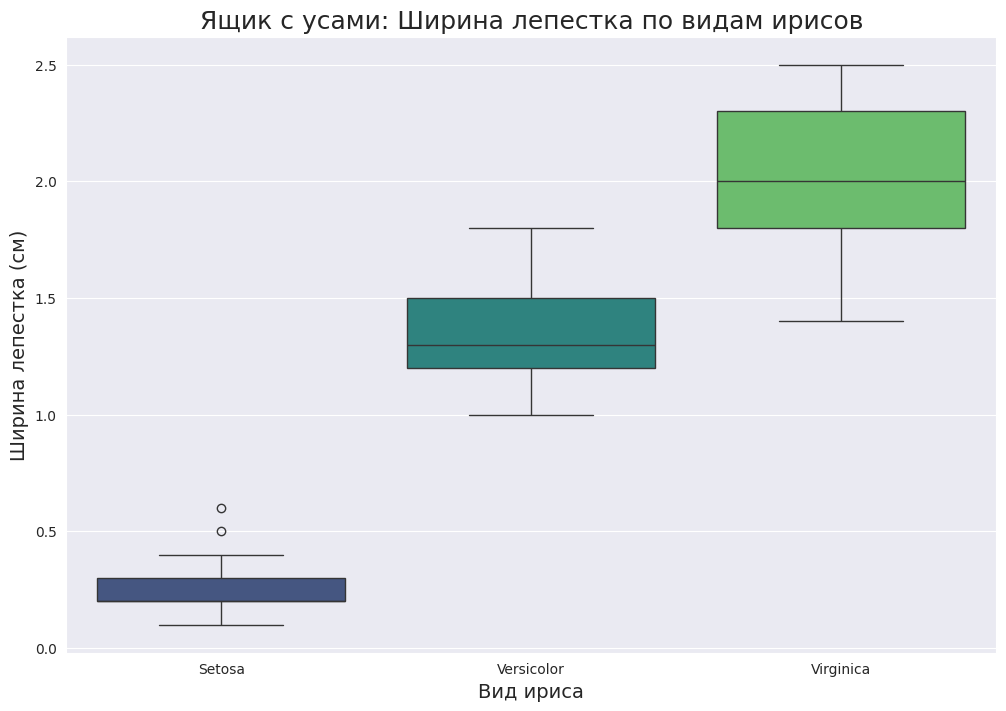

In [91]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="Species", y="PetalWidthCm", palette="viridis")

plt.title("Ящик с усами: Ширина лепестка по видам ирисов", fontsize=18)
plt.xlabel("Вид ириса", fontsize=14)
plt.ylabel("Ширина лепестка (см)", fontsize=14)

plt.show()

<ipython-input-92-97c331b9f8fa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Species', y='PetalWidthCm', palette='viridis')


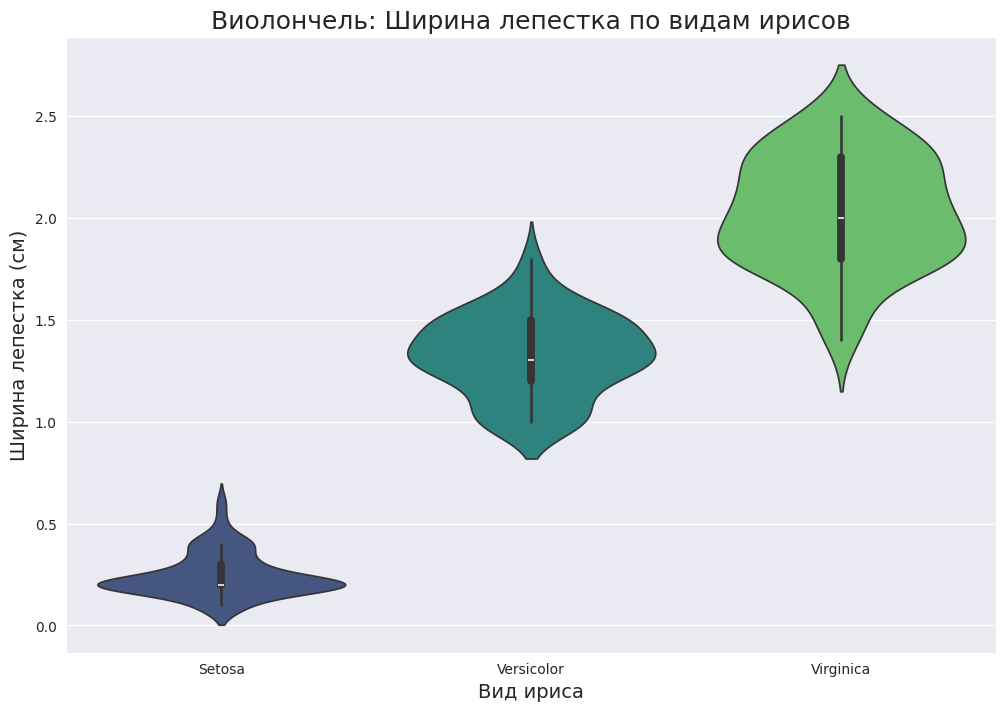

In [92]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x="Species", y="PetalWidthCm", palette="viridis")

plt.title("Виолончель: Ширина лепестка по видам ирисов", fontsize=18)
plt.xlabel("Вид ириса", fontsize=14)
plt.ylabel("Ширина лепестка (см)", fontsize=14)

plt.show()

Сравните два вида графиков. Какой более информативный, а какой - более красивый визуально по вашему мнению? Какую информацию мы можем получить из этих графиков?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

второй более информативный, выглядят оба одинаково по красоте

## 3.3 Попарные графики взаимосвязи признаков


Давайте попробуем построить большую табличку из графиковв размера 4 на 4, где у нас находятся все возможные пары признаков (длина/ширина лепестка, длина/ширина чашелистика). Для этого воспользуйтесь `sns.pairplot` и не забудьте указать параметр `hue`.

<Figure size 800x600 with 0 Axes>

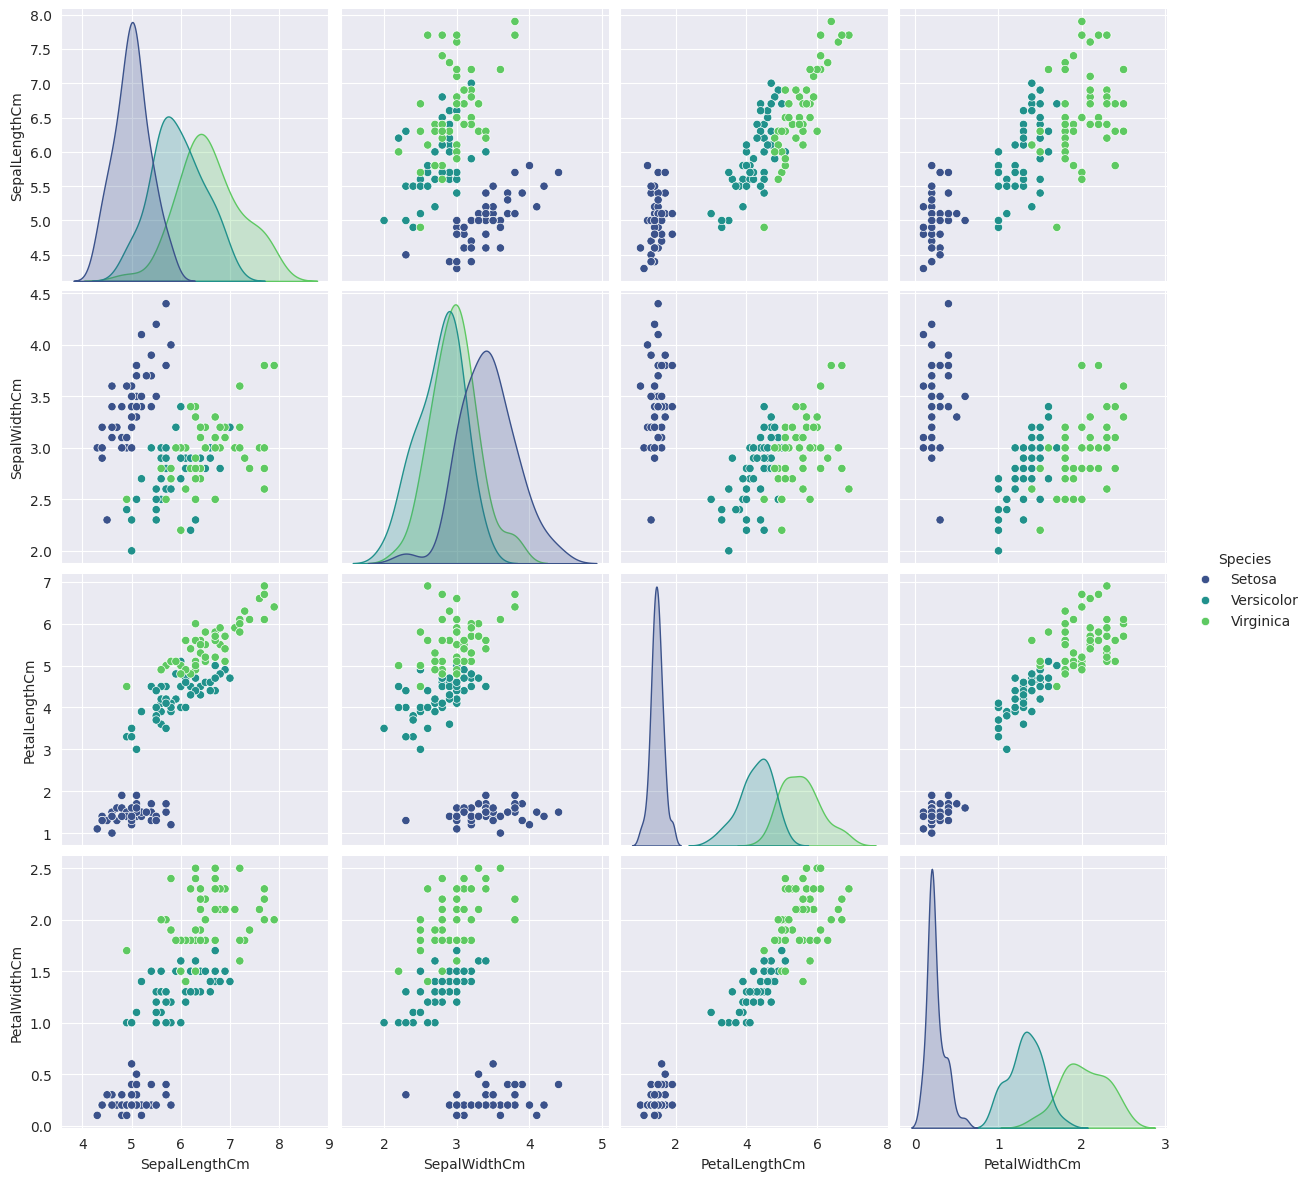

In [94]:
plt.figure(figsize=(8, 6))

sns.pairplot(df, hue="Species", palette="viridis", height=3)

plt.show()

Какую информацию о взаимосвязи признаков вы можете почерпнуть из полученного графика?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

можно заметить кореляцию между признаками например PetalLengthCm PetalWidthCm

и плотность распределения признаков

*Какие графики находятся на диагонали этой таблицы?*

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

графики плотности

Попробуй заменить графики на диагонали таблицы на другие, возможно, более информативные (подсказка: в документации у `sns.pairplot` для этого есть специальный параметр). Выведи полученный график.

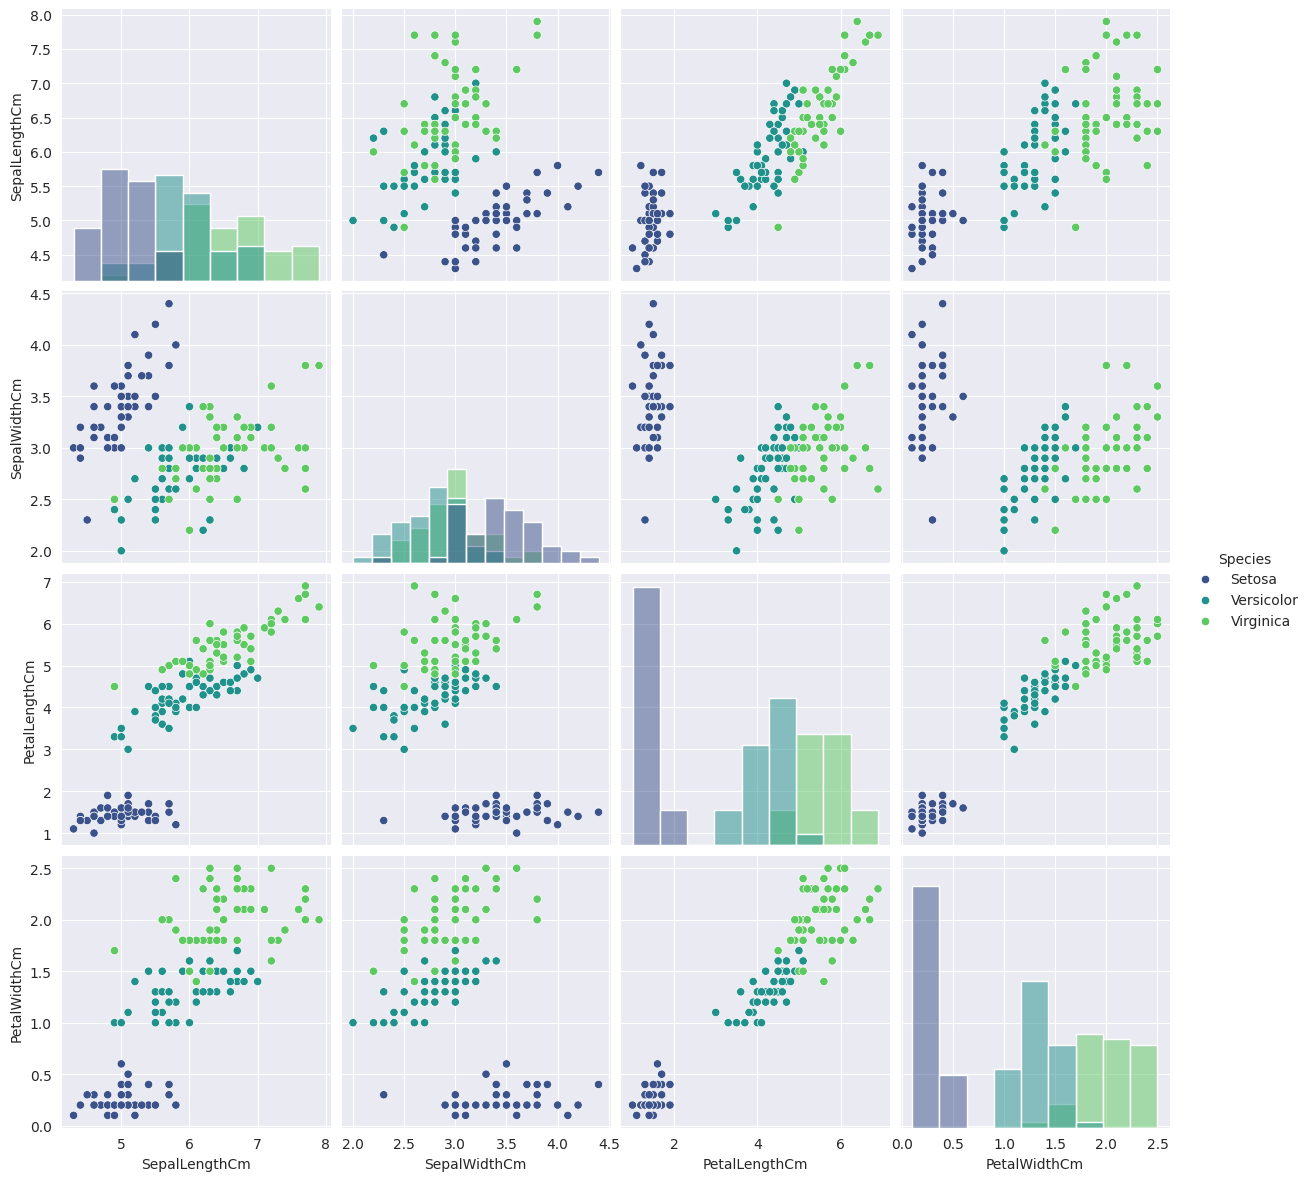

In [96]:
sns.pairplot(df, hue="Species", palette="viridis", height=3, diag_kind="hist")

plt.show()

Какие графики теперь находятся на диагонали таблицы? Получилось ли более информативно?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

гистограмы, нет